<a href="https://colab.research.google.com/github/renzolea/Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [14]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


pd.options.display.float_format = '{:,.2f}'.format

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


#1. Análisis de facturación



In [18]:
# Calculate total revenue and count for each store directly
data_store1 = {'Store': ['Store 1'], 'Count_Items' : [len(tienda)], 'Total_Revenue' : [tienda['Precio'].sum()]}
data_store2 = {'Store': ['Store 2'], 'Count_Items' : [len(tienda2)], 'Total_Revenue' : [tienda2['Precio'].sum()]}
data_store3 = {'Store': ['Store 3'], 'Count_Items' : [len(tienda3)], 'Total_Revenue' : [tienda3['Precio'].sum()]}
data_store4 = {'Store': ['Store 4'], 'Count_Items' : [len(tienda4)], 'Total_Revenue' : [tienda4['Precio'].sum()]}

# Create DataFrames from the data
df_store1 = pd.DataFrame(data_store1)
df_store2 = pd.DataFrame(data_store2)
df_store3 = pd.DataFrame(data_store3)
df_store4 = pd.DataFrame(data_store4)


# Concatenate the DataFrames
revenue_summary = pd.concat([df_store1, df_store2, df_store3, df_store4], ignore_index=True)

# Set float format for display
pd.options.display.float_format = '{:,.2f}'.format

# Display the transposed summary
display(revenue_summary.set_index('Store').T)

Store,Store 1,Store 2,Store 3,Store 4
Count_Items,"2,359.00","2,359.00","2,359.00","2,358.00"
Total_Revenue,"1,150,880,400.00","1,116,343,500.00","1,098,019,600.00","1,038,375,700.00"


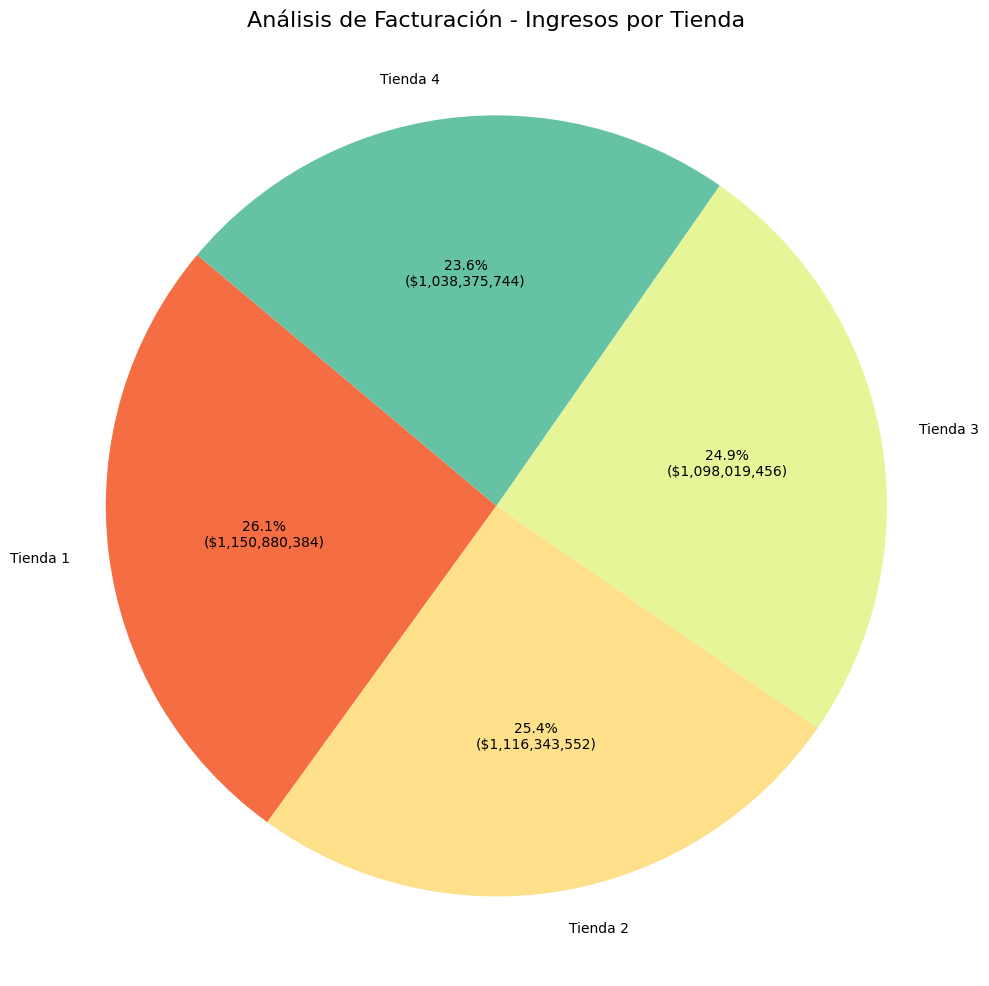

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the pie chart
plt.figure(figsize=(10, 10)) # Increased figure size for better label visibility

# Define a function to format the autopct labels with both percentage and value
def autopct_format(pct):
    total = sum(total_suma['Ingreso Total'])
    value = (pct/100.) * total
    return f'{pct:.1f}%\n(${value:,.0f})'


plt.pie(total_suma['Ingreso Total'], labels=total_suma['Tienda'], autopct=autopct_format, startangle=140, colors=sns.color_palette('Spectral', len(total_suma)), textprops={'fontsize': 10}) # Added textprops for label fontsize

# Add title
plt.title('Análisis de Facturación - Ingresos por Tienda', fontsize=16)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [23]:
# Group by category and count for each store directly
store1_category_counts = tienda.groupby('Categoría del Producto').size().reset_index(name='Item_Count')
store1_category_counts['Store'] = 'Store 1'

store2_category_counts = tienda2.groupby('Categoría del Producto').size().reset_index(name='Item_Count')
store2_category_counts['Store'] = 'Store 2'

store3_category_counts = tienda3.groupby('Categoría del Producto').size().reset_index(name='Item_Count')
store3_category_counts['Store'] = 'Store 3'

store4_category_counts = tienda4.groupby('Categoría del Producto').size().reset_index(name='Item_Count')
store4_category_counts['Store'] = 'Store 4'


# Concatenate the results
category_sales_summary = pd.concat([store1_category_counts, store2_category_counts, store3_category_counts, store4_category_counts], ignore_index=True)

# Pivot the table to make it horizontal
category_sales_horizontal = category_sales_summary.pivot(index='Categoría del Producto', columns='Store', values='Item_Count')

category_sales_horizontal

Store,Store 1,Store 2,Store 3,Store 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


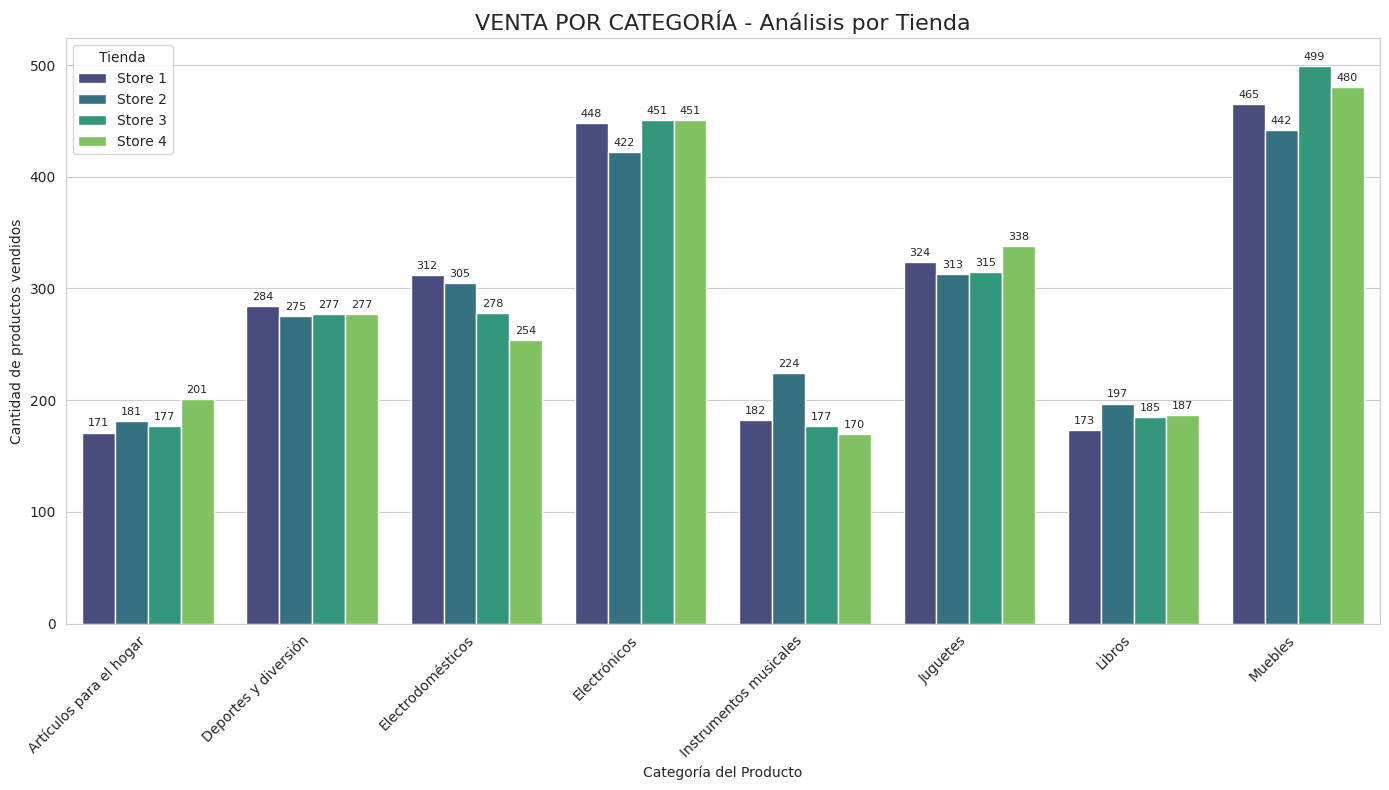

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data is now in category_sales_horizontal, which is pivoted
# We need to prepare it for plotting with seaborn
# Reset index to make 'Categoría del Producto' a column
category_sales_horizontal_reset = category_sales_horizontal.reset_index()

# Melt the DataFrame back to a long format suitable for seaborn
category_sales_long = category_sales_horizontal_reset.melt(
    id_vars='Categoría del Producto',
    var_name='Tienda',
    value_name='Cantidad'
)


# Design of the grouped bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8)) # Increased figure size

# Create the grouped bar plot
ax = sns.barplot(data=category_sales_long, x='Categoría del Producto', y='Cantidad', hue='Tienda', palette='viridis', dodge=True) # Use dodge=True for grouping

# Add labels to the grouped bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=8) # Add labels


plt.title('VENTA POR CATEGORÍA - Análisis por Tienda', fontsize=16) # Updated title
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad de productos vendidos')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [30]:
# Calculate average rating and count for each store directly
store1_rating_summary = {'Store_Name': ['Tienda 1'], 'Item_Count' : [len(tienda)], 'Average_Rating' : [tienda['Calificación'].mean()]}
store2_rating_summary = {'Store_Name': ['Tienda 2'], 'Item_Count' : [len(tienda2)], 'Average_Rating' : [tienda2['Calificación'].mean()]}
store3_rating_summary = {'Store_Name': ['Tienda 3'], 'Item_Count' : [len(tienda3)], 'Average_Rating' : [tienda3['Calificación'].mean()]}
store4_rating_summary = {'Store_Name': ['Tienda 4'], 'Item_Count' : [len(tienda4)], 'Average_Rating' : [tienda4['Calificación'].mean()]}

# Create DataFrames from the data
df_store1_rating = pd.DataFrame(store1_rating_summary)
df_store2_rating = pd.DataFrame(store2_rating_summary)
df_store3_rating = pd.DataFrame(store3_rating_summary)
df_store4_rating = pd.DataFrame(store4_rating_summary)


# Concatenate the DataFrames
average_rating_summary_df = pd.concat([df_store1_rating, df_store2_rating, df_store3_rating, df_store4_rating], ignore_index=True)

# Display the transposed summary
display(average_rating_summary_df.set_index('Store_Name').T)

Store_Name,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Item_Count,"2,359.00","2,359.00","2,359.00","2,358.00"
Average_Rating,3.98,4.04,4.05,4.00


/tmp/ipython-input-32-1119772660.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=average_rating_summary_df, x='Average_Rating', y='Store_Name', palette='viridis') # Changed to horizontal and used 'viridis' palette


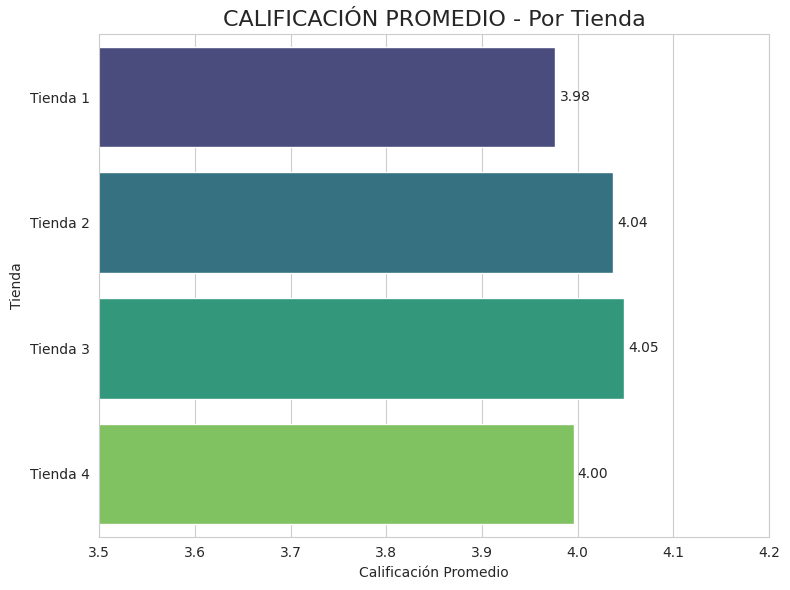

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data is in average_rating_summary_df with columns 'Store_Name' and 'Average_Rating'

# Design of the horizontal bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6)) # Adjusted figure size

# Create the horizontal bar plot
ax = sns.barplot(data=average_rating_summary_df, x='Average_Rating', y='Store_Name', palette='viridis') # Changed to horizontal and used 'viridis' palette

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)


plt.title('CALIFICACIÓN PROMEDIO - Por Tienda', fontsize=16) # Updated title
plt.xlabel('Calificación Promedio')
plt.ylabel('Tienda')
plt.xlim(3.5, 4.2) # Set a reasonable x-axis limit to emphasize differences
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
#función para contabilizar productos
def productos_tienda(df, nombre_tienda):
    conteo_productos = df['Producto'].value_counts()
    mas_vendido = conteo_productos.idxmax()
    menos_vendido = conteo_productos.idxmin()
    return pd.DataFrame({'Tienda' : [nombre_tienda], 'Producto más vendido' : [mas_vendido], 'Producto menos vendido' : [menos_vendido]})

#Aplicar a la funcion por cada tienda
m1 = productos_tienda(tienda, 'Tienda 1')
m2 = productos_tienda(tienda2, 'Tienda 2')
m3 = productos_tienda(tienda3, 'Tienda 3')
m4 = productos_tienda(tienda4, 'Tienda 4')

#Concatenación
productos_mas_menos_vendidos = pd.concat([m1, m2, m3, m4], ignore_index=True)
productos_mas_menos_vendidos

,Tienda,Producto más vendido,Producto menos vendido
0,Tienda 1,Microondas,Auriculares con micrófono
1,Tienda 2,Iniciando en programación,Juego de mesa
2,Tienda 3,Kit de bancas,Bloques de construcción
3,Tienda 4,Cama box,Guitarra eléctrica


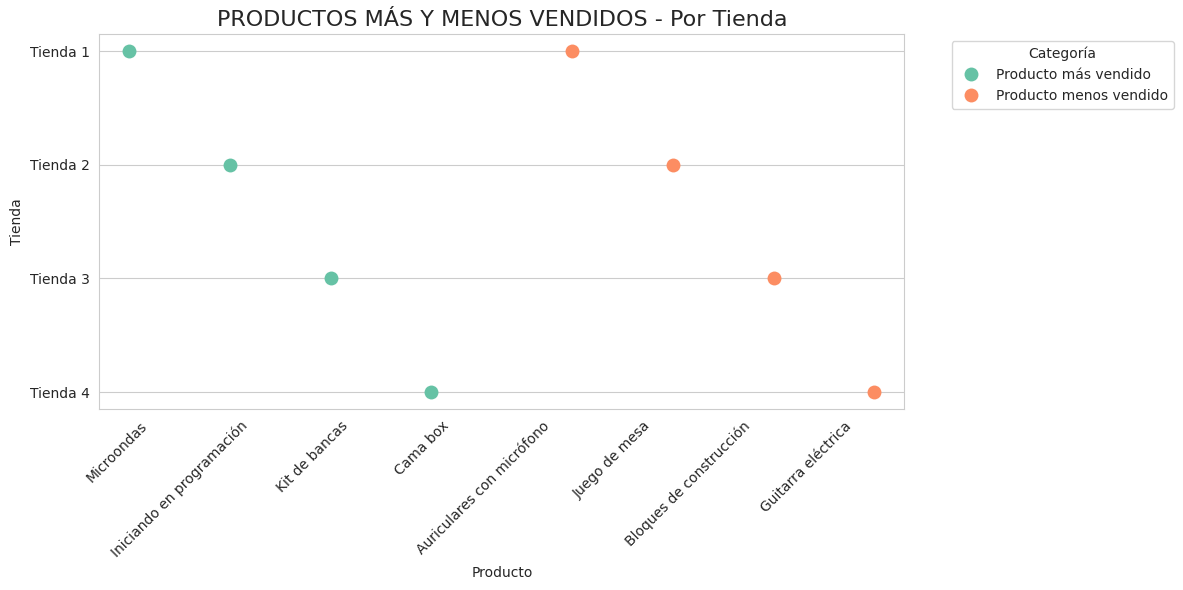

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparar datos en formato largo
df_largo = pd.melt(
    productos_mas_menos_vendidos,
    id_vars='Tienda',
    value_vars=['Producto más vendido', 'Producto menos vendido'],
    var_name='Tipo de Producto',
    value_name='Producto'
)

# Crear gráfico
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Dibujar el gráfico de puntos
ax = sns.stripplot(data=df_largo, x='Producto', y='Tienda', hue='Tipo de Producto', dodge=True, palette='Set2', size=10)

# Estética
plt.title('PRODUCTOS MÁS Y MENOS VENDIDOS - Por Tienda', fontsize=16)
plt.xlabel('Producto')
plt.ylabel('Tienda')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [ ]:
#función para calcular promedio del envío de cada tienda
def promedio_tienda_envio(df, nombre_tienda):
    contador_envio = len(df)
    suma_promedio_envio = df['Costo de envío'].sum()/contador_envio
    return pd.DataFrame({'Tienda': [nombre_tienda], 'Conteo' : [contador_envio], 'Promedio' : [suma_promedio_envio]})

#Aplicación de la función a todas las tiendas

e1 = promedio_tienda_envio(tienda, 'Tienda 1')
e2 = promedio_tienda_envio(tienda2, 'Tienda 2')
e3 = promedio_tienda_envio(tienda3, 'Tienda 3')
e4 = promedio_tienda_envio(tienda4, 'Tienda 4')

#concatenación
promedio_envios = pd.concat([e1, e2, e3, e4], ignore_index=True)
promedio_envios

,Tienda,Conteo,Promedio
0,Tienda 1,2359,"26,018.61"
1,Tienda 2,2359,"25,216.24"
2,Tienda 3,2359,"24,805.68"
3,Tienda 4,2358,"23,459.46"


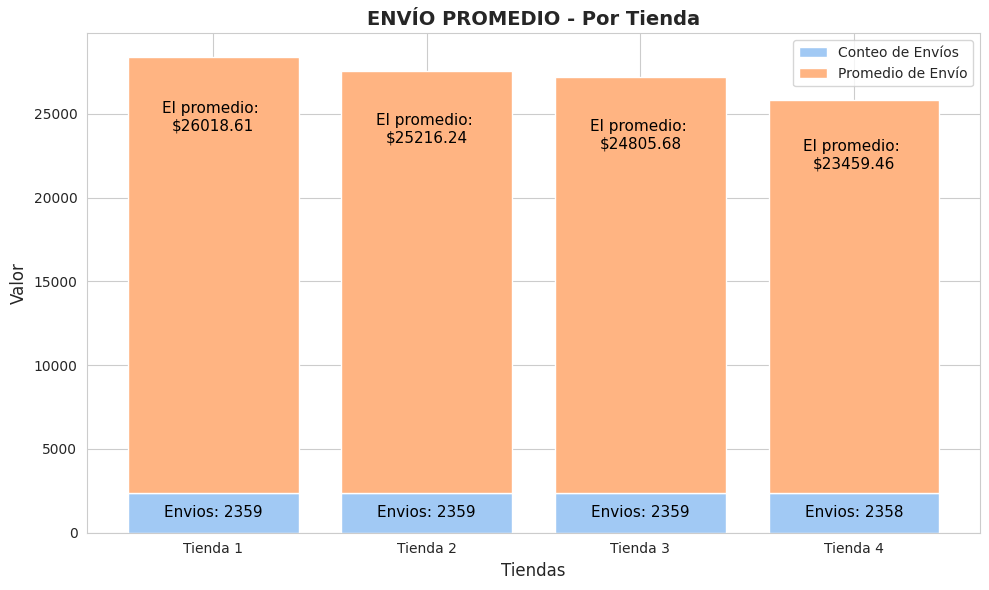

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set_style("whitegrid")
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(10,6))

# Datos base
tiendas = promedio_envios['Tienda']
conteo = promedio_envios['Conteo']
promedio = promedio_envios['Promedio']
ax.bar(tiendas, conteo, label='Conteo de Envíos')
ax.bar(tiendas, promedio, bottom=conteo, label='Promedio de Envío')

# Mostrar valores en cada sección de la barra
for i in range(len(promedio_envios)):
    tienda = tiendas[i]
    c = conteo[i]
    p = promedio[i]

    # Texto sobre la barra de Conteo
    ax.text(i, c / 2, f'Envios: {c:.0f}', ha='center', va='center', color='black', fontsize=11)

    # Texto sobre la parte superior del Promedio
    top = c + p
    ax.text(i, top - (p * 0.1), f'El promedio: \n${p:.2f}', ha='center', va='top', color='black', fontsize=11)

# Títulos y etiquetas
ax.set_title('ENVÍO PROMEDIO - Por Tienda', fontsize=14, fontweight='bold')
ax.set_xlabel('Tiendas', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)
ax.set_xticks(range(len(tiendas)))
ax.set_xticklabels(tiendas)
ax.legend()
plt.tight_layout()
plt.show()

#6. Análisis del desempeño geográfico

In [ ]:
!pip install folium

In [ ]:
#Unión de todos los datasets como columnas

tienda['tienda'] = 'Tienda 1'
tienda2['tienda'] = 'Tienda 2'
tienda3['tienda'] = 'Tienda 3'
tienda4['tienda'] = 'Tienda 4'

#DataFrames
ventas_geografico = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
ventas_geografico[['tienda', 'lat', 'lon', 'Precio', 'Calificación']].head()

,tienda,lat,lon,Precio,Calificación
0,Tienda 1,4.61,-74.08,"164,300.00",4
1,Tienda 1,6.25,-75.56,"192,300.00",1
2,Tienda 1,10.40,-75.51,"209,600.00",1
3,Tienda 1,3.44,-76.52,"757,500.00",4
4,Tienda 1,6.25,-75.56,"335,200.00",5


In [ ]:
import folium
from folium.plugins import HeatMap

# Crear un DataFrame base con solo latitud y longitud
map_data = ventas_geografico[['lat', 'lon', 'Precio']]

# Crear un mapa base centrado en el promedio de lat/lon
mapa = folium.Map(location=[map_data['lat'].mean(), map_data['lon'].mean()], zoom_start=5)

# Añadir capa de heatmap ponderada por Precio
heat_data = [[row['lat'], row['lon'], row['Precio']] for index, row in map_data.iterrows()]
HeatMap(heat_data, radius=12).add_to(mapa)

mapa


# **INFORME FINAL** 📋


# **📌Introducción**

El presente informe tiene como objetivo brindar una recomendación clara y objetiva al Sr. Juan respecto a cuál de sus cuatro tiendas debería considerar vender. Para tomar esta decisión estratégica, se han analizado diversos factores relevantes en el desempeño de cada tienda: ingresos totales, categorías de productos más y menos vendidos, calificaciones promedio otorgadas por los clientes, productos con mayor y menor rotación y el coste de envío promedio. A partir de estos indicadores, se determina cuál tienda representa la opción más viable para ser vendida, maximizando el valor de la transacción y minimizando el impacto negativo en el portafolio del Sr. Juan.

#**📈 Desarrollo**

1. **🧾 Ingresos Totales por Tienda**

Resultado obtenido en el primer requerimiento:

+ Tienda 1: $1,150,880,400.00

+  Tienda 2: $1,116,343,500.00

- Tienda 3: $1,098,019,600.00

- Tienda 4: $1,038,375,700.00


Gráfica del resultado:

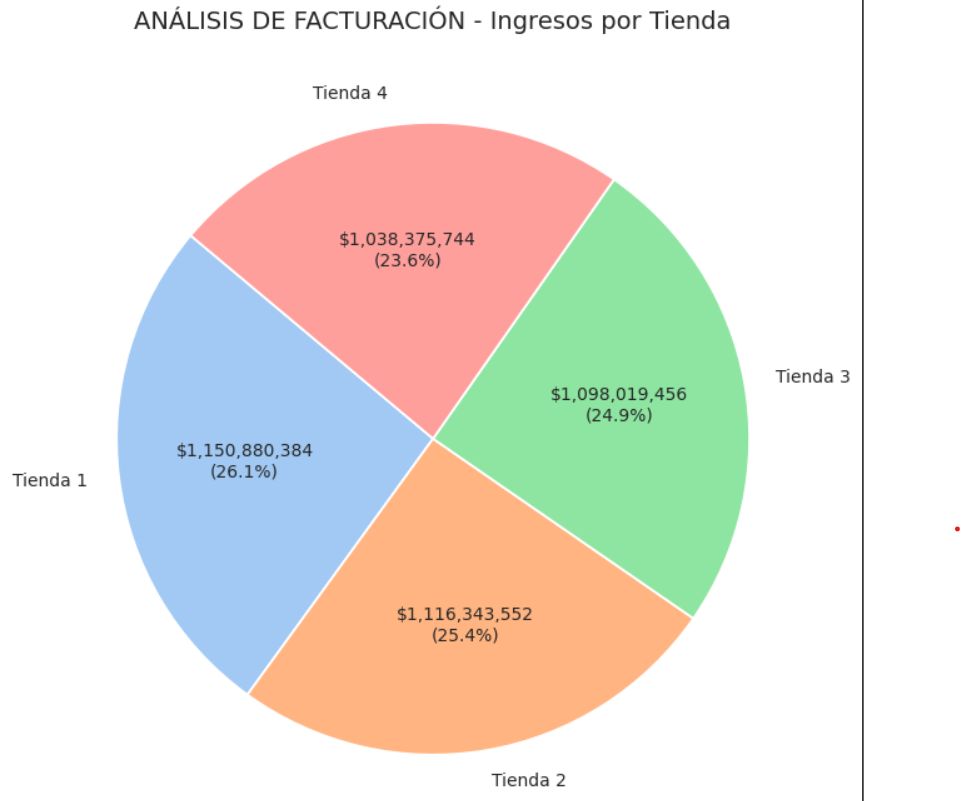


**Análisis:**
Tienda 1 lidera en ingresos totales, lo que sugiere un excelente desempeño comercial. Aunque las demás tiendas tienen un número similar de ventas, el monto recaudado por Tienda 1 es significativamente mayor.

2. **🛍️ Categorías Más y Menos Vendidas**

Categoría más vendida en todas las tiendas:

+ Muebles

Categoría menos vendida por tienda:

+ Tienda 1	Artículos para el hogar (171)

+ Tienda 2	Artículos para el hogar (181)

+ Tienda 3	Instrumentos musicales (177)

+ Tienda 4	Instrumentos musicales (170)

Gráfica de los resultados obtenidos:

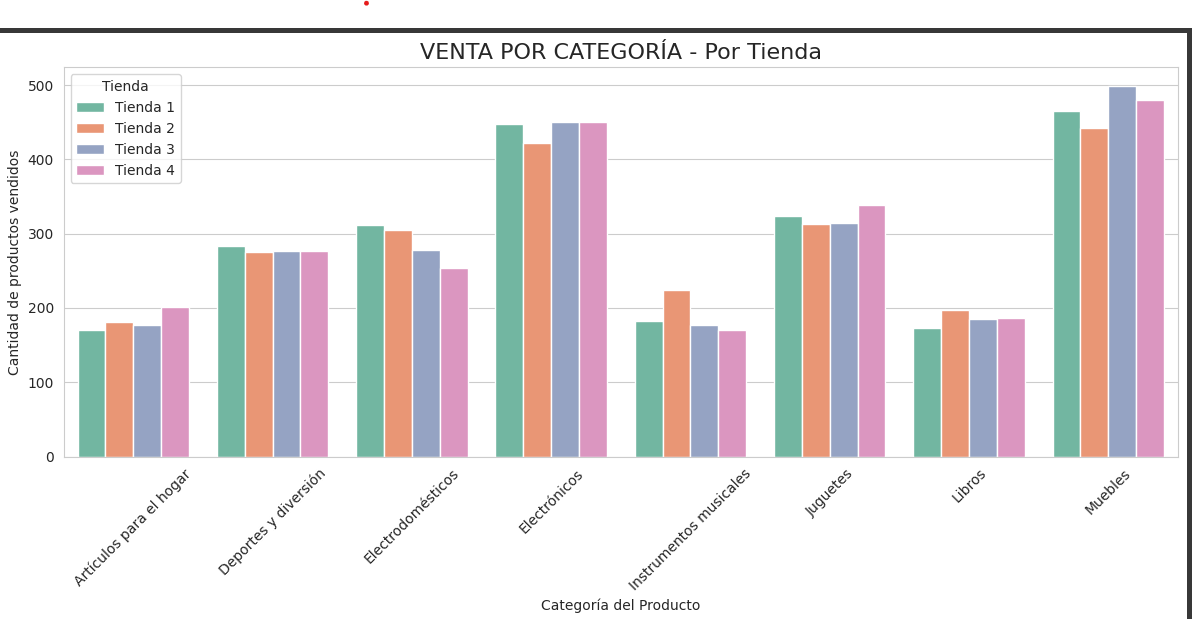

**Análisis:**
La consistencia de la categoría “Muebles” como la más vendida resalta una tendencia del consumidor. Por otro lado, “Artículos para el hogar” e “Instrumentos musicales” presentan baja rotación, lo que indica áreas que pueden requerir ajustes en promoción o surtido.


3. **⭐ Calificaciones Promedio por Tienda**

Calificación promedio por cada una de las tiendas:

+ Tienda 1:	3.98

+ Tienda 2:	4.04

+ Tienda 3:	4.05

+ Tienda 4:	4.00

Gráfica de los resultados obtenidos:
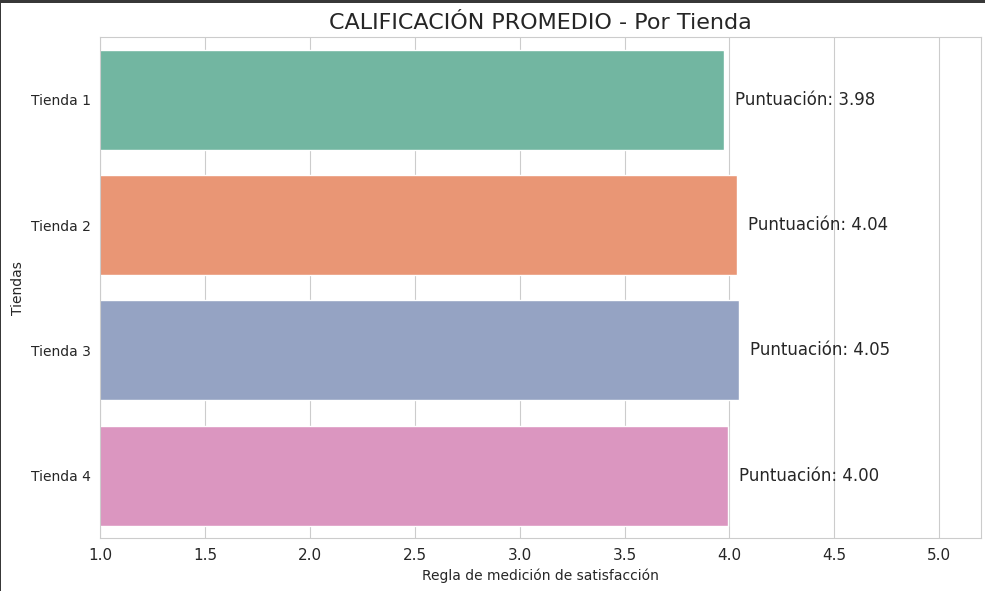

**Análisis:**
Tienda 3 presenta la mejor calificación promedio, lo que refleja un mayor nivel de satisfacción por parte de los clientes. Aunque las diferencias son pequeñas, este aspecto podría ser crucial en decisiones de fidelización.


4. 🎯 Productos Más y Menos Vendidos

Productos más vendidos por tienda:

+ Tienda 1: Microondas
+ Tienda 2: Iniciando en programación
+ Tienda 3:	Kit de bancas
+ Tienda 4:	Cama box

Productos menos vendidos por tienda

+ Tienda 1: Ariculares con micrófono
+ Tienda 2: Juego de mesa
+ Tienda 3: Bloques de construcción
+ Tienda 4: Guitarra Eléctrica

Gráfica de los resultados obtenidos:
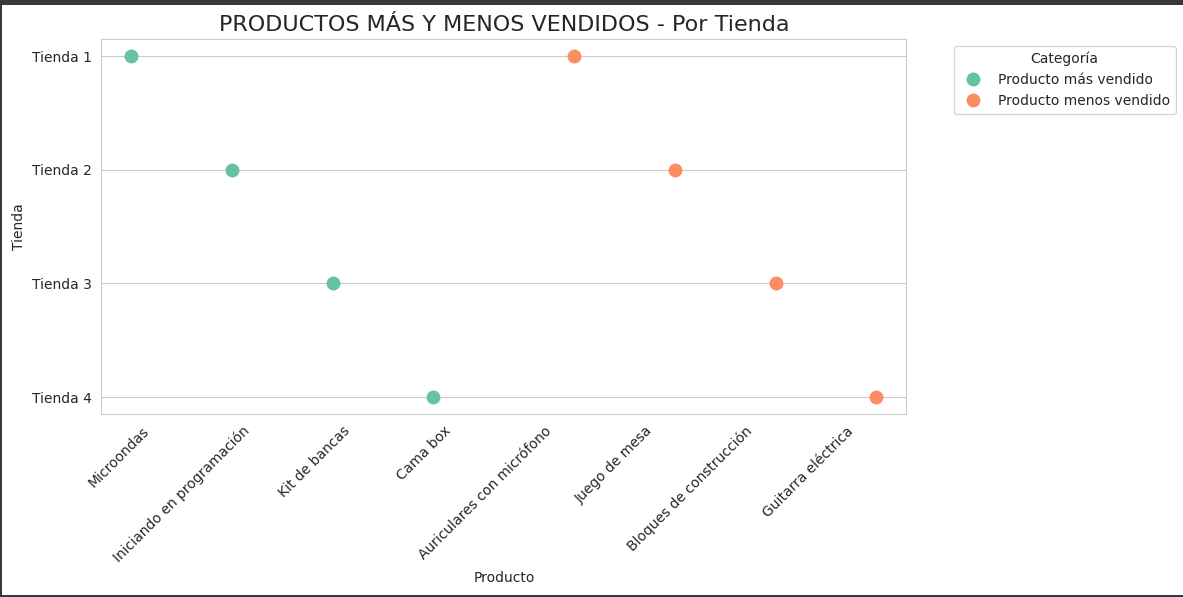

**Análisis:**
Cada tienda muestra particularidades en sus productos estrella y de bajo desempeño. Esto sugiere diferentes perfiles de consumidor según la tienda, lo cual es útil para definir estrategias de surtido personalizado.


5. **🚚 Costo de Envío Promedio**

Promedios de Envío por tienda:

+ Tienda 1:	$26,018.61

+ Tienda 2:	$25,216.24

+ Tienda 3:	$24,805.68

+ Tienda 4:	$23,459.46

Gráfica de los resultados obtenidos:
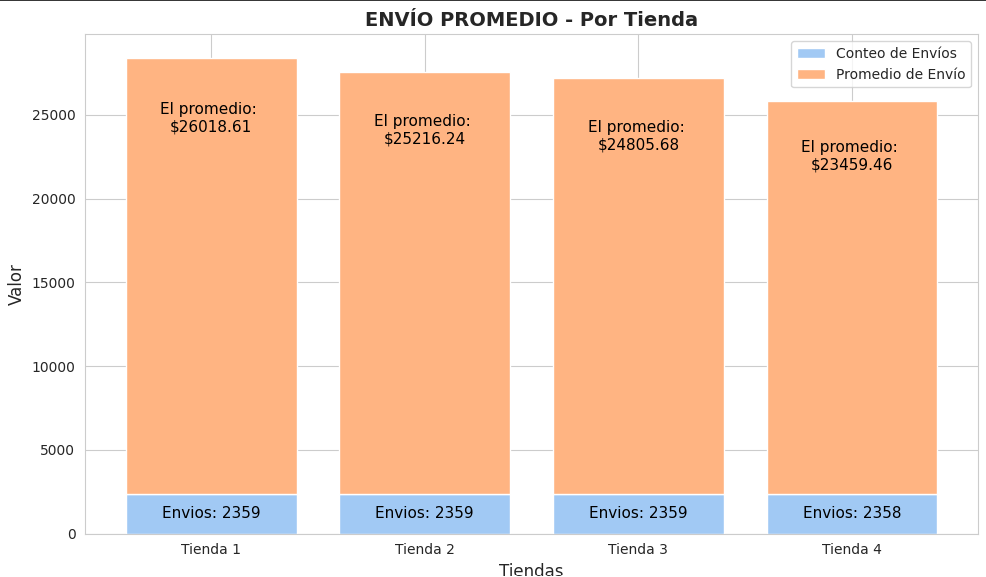


**Análisis:**
Tienda 4 destaca por tener el costo de envío más bajo. Aunque esto puede resultar atractivo para los clientes, es importante considerar si esto afecta el margen de ganancia. Tienda 1 tiene el envío más caro, aunque también es la que más ingresa.

6. **📍 Analisis geográfico del Rendimiento**

Visualización Gráfica de los resultados:
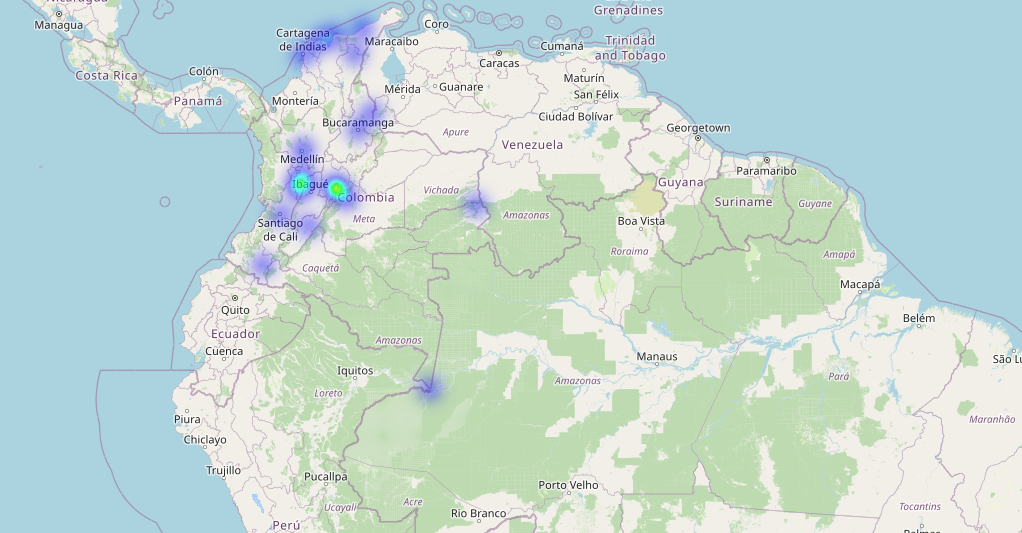

**Análisis:**
A través de mapas geoespaciales, se identificaron patrones en la distribución de ventas y eficiencia por ubicación.

##**✅ Conclusión**

Tras el análisis integral de los diferentes indicadores:

+ Tienda 1 lidera en ingresos totales, con un buen equilibrio de ventas y diversidad de productos vendidos, lo que sugiere una estrategia comercial efectiva.
Mientras Tienda 4 genera el menor ingreso total.

+ Tienda 3 destaca en satisfacción del cliente, aunque Tienda 4 no tiene la peor calificación, está por debajo de Tienda 2 y Tienda 3, que reflejan una mejor experiencia percibida por el cliente.

+ Tienda 4 tiene productos de baja rotación como "Guitarra eléctrica", que podrían indicar menor demanda específica. Además, sus productos estrella no reflejan una ventaja competitiva significativa frente a las otras tiendas.

+ Tienda 4 tiene el coste de envío más bajo, lo cual podría ser un punto a favor. Sin embargo, este beneficio logístico no compensa completamente el rendimiento general más bajo observado en otros indicadores.

+ La Tienda 4, a pesar de tener una buena cobertura de clientes, muestra menor rendimiento en términos de ingresos y cantidad de productos vendidos. Este análisis refuerza la hipótesis de que factores externos a la calidad del servicio, como la localización o la competencia local, podrían estar afectando su desempeño.

##**🔎 Recomendación:**

Tomando en cuenta de forma integral todos los factores analizados, se recomienda al Sr. Juan **vender Tienda 4**.

+ Esta tienda muestra el rendimiento general más bajo en términos de ingresos, ventas por categoría, y diversidad de productos vendidos. Aunque cuenta con el coste de envío más bajo, este aspecto no es suficiente para compensar sus debilidades en los demás indicadores.

+ El análisis geoespacial indica que la ubicación de la Tienda 4 podría estar limitando su crecimiento frente a otras tiendas más competitivas.

+ Vender Tienda 4 permitirá concentrar sus esfuerzos en las tiendas con mejor desempeño, como Tienda 1, Tienda 2 o Tienda 3, que mantienen una buena relación entre ingresos, satisfacción del cliente y eficiencia logística. Además, la venta de Tienda 4 puede representar una oportunidad para reinvertir en mejoras tecnológicas, inventario o expansiones de mercado en sus tiendas más rentables.



Por lo tanto, la recomendación estratégica es que el Sr. Juan proceda con la venta de Tienda 4, ya que esta acción permitirá optimizar su portafolio comercial y reforzar el crecimiento sostenido de su negocio.

